In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
df = pd.read_pickle('../working/df_after_03.pkl')
var_info = pd.read_pickle('../working/var_info_after_04.pkl')
choices = pickle.load(open('../code/choices.pkl', 'rb'))
var_info

,dtypes,nunique,notnull,isnull,var,vtype,remarks,status
성별,int64,2,4000,0,input,nominal,one-hot,NaN
연령,int64,57,4000,0,input,ordinal,scaling 필요,NaN
지역,int64,7,4000,0,input,nominal,one-hot,NaN
직업,int64,7,4000,0,input,nominal,one-hot,NaN
소득,int64,12,4000,0,input,ordinal,99(모름/무응답) --> 1(99만원 미만) 변경 필요 + scaling 필요,scaling 처리 필요
최종학력,int64,12,4000,0,input,nominal,"재학 --> 졸업 순으로 변경, 학생 컬럼 추가: 재학인 경우 + scaling ...",scaling 처리 필요
주거형태,int64,5,4000,0,input,nominal,one-hot,NaN
결혼여부,int64,3,4000,0,input,nominal,one-hot,NaN
자녀총수,int64,4,4000,0,input,ordinal,자녀 총수 99(무응답) --> 0 변경 필요 + scaling 필요,scaling 처리 필요
평일인터넷,float64,37,2603,1397,input,number,null 처리 + scaling 필요,scaling 처리 필요


#### one-hot encoding

In [ ]:
# '결혼여부' 컬럼을 one-hot encoding
pd.get_dummies(, prefix=)

In [6]:
# 일반화
col = '결혼여부'
pd.get_dummies(, prefix=)

,결혼여부_1,결혼여부_2,결혼여부_3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
3995,0,0,1
3996,1,0,0
3997,1,0,0
3998,0,0,1


- 변수 종류를 변수로

In [7]:
# 처리 방식에 따른 컬럼들을 각각 저장
cols_one_hot = ['성별', '지역', '직업', '최종학력', '주거형태', '결혼여부']
cols_min_max = ['연령', '소득', '자녀총수'] 
cols_standard = ['평일인터넷', '토요일인터넷', '일요일인터넷', 
                 '평일모바일', '토요일모바일', '일요일모바일']

In [27]:
# 처리 방식에 따른 컬럼들을 var_info의 정보 활용
cols_one_hot = var_info[var_info['remarks'].str.contains('one-hot')].index
cols_min_max = var_info[var_info['vtype']=='ordinal'].index 
cols_standard = var_info[var_info['vtype']=='number'].index

- one-hot encoding 한번에 처리

In [8]:
# one-hot encoding하여 하나의 df로 만들기 --> 각 df 만들고 concat
data_one_hot
for col in cols_one_hot:

    
data_one_hot

,성별_1,성별_2,지역_1,지역_2,지역_3,지역_4,지역_5,지역_6,지역_7,직업_1,...,최종학력_6.5,최종학력_7.0,주거형태_1,주거형태_2,주거형태_3,주거형태_4,주거형태_5,결혼여부_1,결혼여부_2,결혼여부_3
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3996,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3997,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3998,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [35]:
# var_info 업데이트
[cols_one_hot, 'status']  'done'

#### skewness 처리 + standardization 적용

- skewness 처리

In [ ]:
# skewness 측정


<AxesSubplot:>

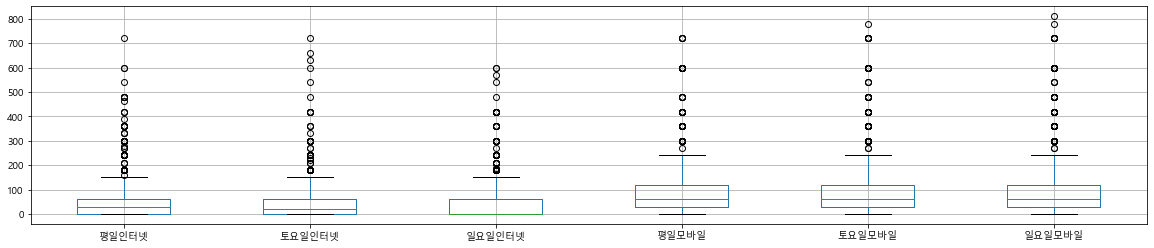

In [9]:
# cols_standard 컬럼들에 대해 boxplot으로 분포 확인
boxplot(figsize=(20,4))

In [ ]:
# 여러 컬럼 skewness 동시 측정 및 데이터 변환


In [10]:
# 제곱근 적용한 값들의 skewness


평일인터넷     0.511667
토요일인터넷    0.611467
일요일인터넷    0.802199
평일모바일     0.411515
토요일모바일    0.460749
일요일모바일    0.344990
dtype: float64

In [3]:
# 자연로그 취한 것의 skewness


NameError: name 'cols_standard' is not defined

In [12]:
# 변환 방법에 따른 skewness를 df로 만들기 --> df_skew
{'log':np.log(df[cols_standard]),
 'log2':np.log2(df[cols_standard]),
 'log10':np.log10(df[cols_standard]),
 'sqrt':np.sqrt(df[cols_standard]),
 'cube_root':(df[cols_standard]**(1/3))}

<ipython-input-12-f880de69130a>:2: RuntimeWarning: divide by zero encountered in log
  df_skew = pd.DataFrame({'log':np.log(df[cols_standard]).replace(-np.inf,0).skew(),
<ipython-input-12-f880de69130a>:3: RuntimeWarning: divide by zero encountered in log2
  'log2':np.log2(df[cols_standard]).replace(-np.inf,0).skew(),
<ipython-input-12-f880de69130a>:4: RuntimeWarning: divide by zero encountered in log10
  'log10':np.log10(df[cols_standard]).replace(-np.inf,0).skew(),


<AxesSubplot:>

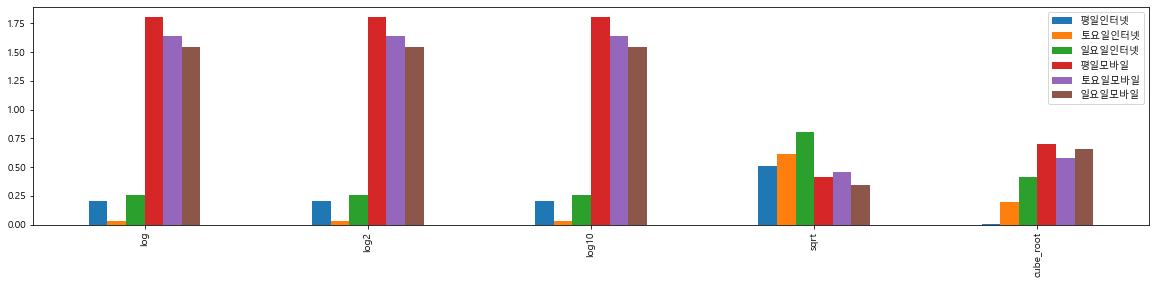

In [15]:
# 구해진 skewness df에 절대값을 취하고 bar charrt
df_skew

In [16]:
pd.DataFrame([df_skew.abs().max(), df_skew.std()])   # 3제곱근이 가장 좋은 것을 확인

,log,log2,log10,sqrt,cube_root
0,1.800426,1.800426,1.800426,0.802199,0.704441
1,0.939968,0.939968,0.939968,0.163643,0.485324


<AxesSubplot:>

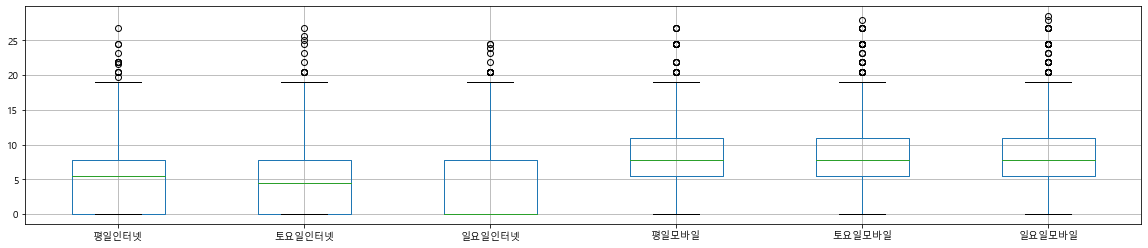

In [17]:
# 제곱근 적용한 결과 boxplot
boxplot(figsize=(20,4))

<AxesSubplot:>

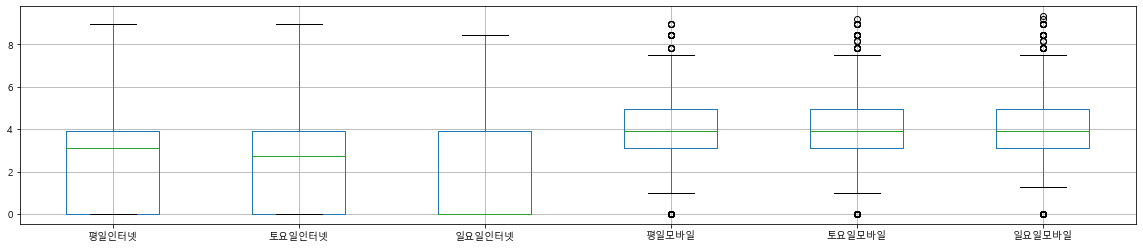

In [18]:
# 세제곱근 적용한 결과 boxplot
boxplot(figsize=(20,4))

In [ ]:
# 3제곱근 적용하고 standardization 적용
data_standard =

- standardization 적용

In [20]:
data_standard = 

<AxesSubplot:>

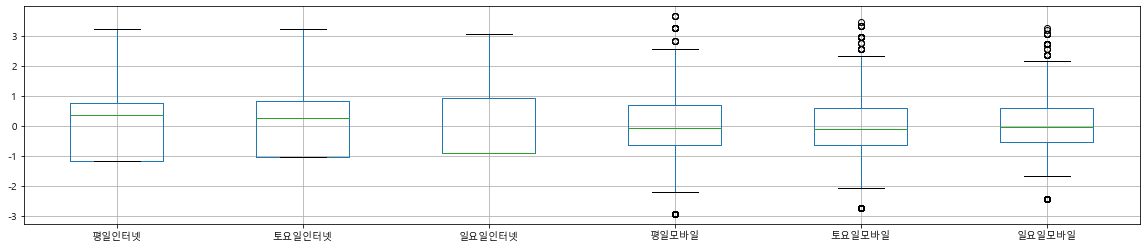

In [21]:
# 변환된 데이터의 분포 확인
data_standard.boxplot(figsize=(20,4))

In [39]:
# var_info 업데이트
[cols_standard, 'status'], 'done'

#### min-max scaling 적용

In [22]:
# min-max scaling 적용
data_min_max = df[cols_min_max]
data_min_max = 

In [36]:
# var_info 업데이트
[cols_min_max, 'status'], 'done'

#### target 변수 값 변경

In [ ]:
# y값(target) 결정
df['구매의향'].value_counts().sort_index()

In [ ]:
# '구매의향'이 4이상이면 1
df['구매'] = df['구매의향'].apply

In [23]:
df['구매'].mean()

0.34725

In [37]:
['구매의향', 'status'], 'done'

#### 머신러닝을 위한 데이터셋 완성

In [25]:
# 데이터셋 완성
data_TV = pd.read_pickle('../working/data_TV.pkl')

In [28]:
pd.concat([data_one_hot,
           data_min_max,
           data_standard,
           data_TV,
           df[['구매']]], axis=1).to_pickle('../working/encoded_data.pkl')

In [41]:
var_info.to_pickle('../working/var_info_after_05.pkl')
var_info

## 참고: 좀 더 고급진 ...

#### 최종학력에 대한 encoding방법

In [29]:
# 1. one-hot
# 2. 최종학력을 정수로 encoding
# 3. 차지하는 비중을 uniform으로 mapping (예를 들어)
df_agg = df['최종학력'].value_counts(normalize=True).sort_index().cumsum()
df_agg - df['최종학력'].value_counts(normalize=True).sort_index()/2

1.0    0.000500
2.0    0.005500
2.5    0.026875
3.0    0.067625
3.5    0.113500
4.0    0.299125
4.5    0.464500
5.0    0.525500
5.5    0.626000
6.0    0.820625
6.5    0.977250
7.0    0.990250
Name: 최종학력, dtype: float64

In [30]:
col_map = (df_agg - df['최종학력']
                    .value_counts(normalize=True)
                    .sort_index()/2).round(6).to_dict()

In [31]:
df['최종학력_encoded'] = df['최종학력'].replace(col_map)

- ordinal로 처리한 최종학력 결과를 반영한 데이터셋 만들기

In [ ]:
# 최종학력을 ordinal로 처리한 결과를 반영한 데이터셋
pd.concat([data_one_hot[data_one_hot.columns[~data_one_hot.columns.str.contains('최종학력')]],
           data_min_max,
           data_standard,
           data_TV,
           df[['최종학력_encoded','구매']]], axis=1).to_pickle('../working/encoded_data_학력_pkl')

#### sklearn의 standardization, min-max scaling

In [ ]:
# sklean 이용한 standardization 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_standard)
scaler.mean_
data_standard = scaler.transform(data_standard)

In [ ]:
# sklean 이용한 min-max scaling 적용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_min_max)
data_min_max = scaler.transform(data_min_max)